
In this notebook, I try to implement pandas plotting functions using basic matplotlib functions.
* Author: Yassine Alouini
* Date: 7-5-2016
* License: MIT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
# The recent grads dataset is assumed to be at the same level 
# as the notebook
recent_grads_df = pd.read_csv("recent-grads.csv")

In [8]:
# First line of the recent grads data
recent_grads_df.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [9]:
# Last line of the recent grads data
recent_grads_df.tail(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
172,173,3501,LIBRARY SCIENCE,1098,134,964,Education,0.87796,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [11]:
# Some general descriptive statistics
recent_grads_df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [14]:
# Looking for missing values and counting the rows
cleaned_recent_grads_df = recent_grads_df.dropna()
removed_rows_count = len(recent_grads_df) - len(cleaned_recent_grads_df)
print("{line} line(s) removed".format(line=removed_rows_count))

1 line(s) removed


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fd36989b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4fd35cf2e8>]], dtype=object)

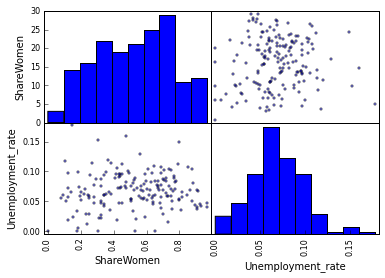

In [80]:
# A scatter matrix using pandas plotting tools
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cleaned_recent_grads_df[
        ["ShareWomen","Unemployment_rate"]])

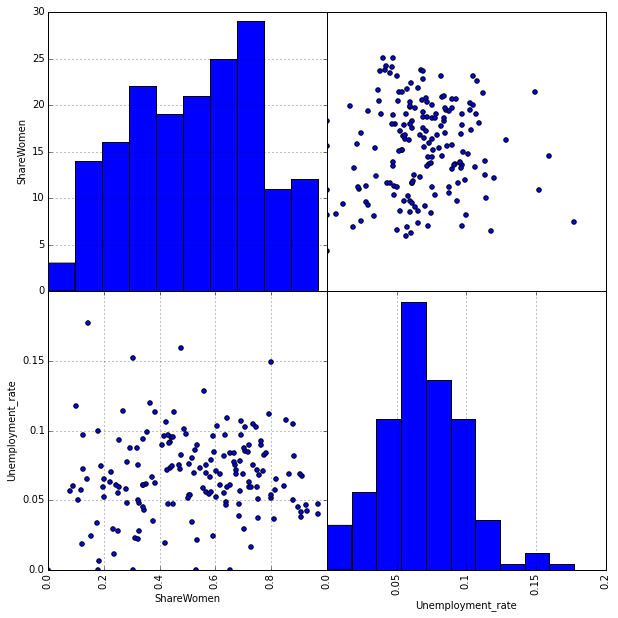

In [53]:
# The same plot as above, this time using matplotlib 
# low-level functions.
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.ravel()
ax1, ax2, ax3, ax4 = axes


cleaned_recent_grads_df["ShareWomen"].hist(ax=ax1)
cleaned_recent_grads_df.plot(x='Unemployment_rate',
                                     y='ShareWomen',
                                     ax=ax2, kind='scatter')
cleaned_recent_grads_df.plot(x='ShareWomen', 
                                     y='Unemployment_rate', 
                                     ax=ax3, kind='scatter')
cleaned_recent_grads_df["Unemployment_rate"].hist(ax=ax4)

# Remove some x and y axes
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

# Set axes labels

ax1.set_ylabel("ShareWomen")
ax3.set_xlabel("ShareWomen")
ax3.set_ylabel("Unemployment_rate")
ax4.set_xlabel("Unemployment_rate")

# Set axes tick labels

ax1.set_yticklabels([0, 5, 10, 15, 20, 25, 30])
ax3.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
ax3.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax4.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

# Adjust x and y axes value limits

ax1.set_ylim(0,30)
ax2.set_xlim(0.0, 0.20)
ax3.set_xlim(0.0, 1.0)
ax3.set_ylim(0.0, 0.20)
ax4.set_xlim(0.0, 0.20)

# Adjust figure spacing

fig.subplots_adjust(wspace=0, hspace=0)


In [54]:
# Create a ShareMen column containing the proportion of men
recent_grads_df["ShareMen"] = recent_grads_df["Men"] / recent_grads_df["Total"]

In [70]:
# Select only the "Arts" majors
arts_grads_df = recent_grads_df[recent_grads_df.Major_category == "Arts"]

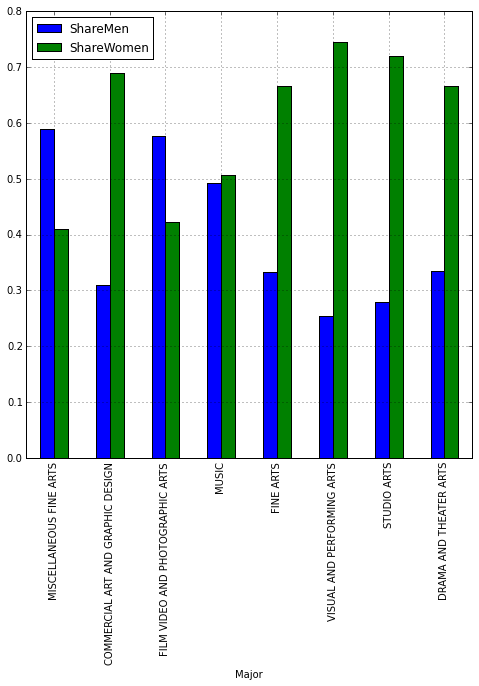

In [78]:
# A stacked bar plot using pandas
arts_grads_df.set_index("Major")[["ShareMen", "ShareWomen"]].plot(figsize=(8,8), 
                                                                  kind="bar")

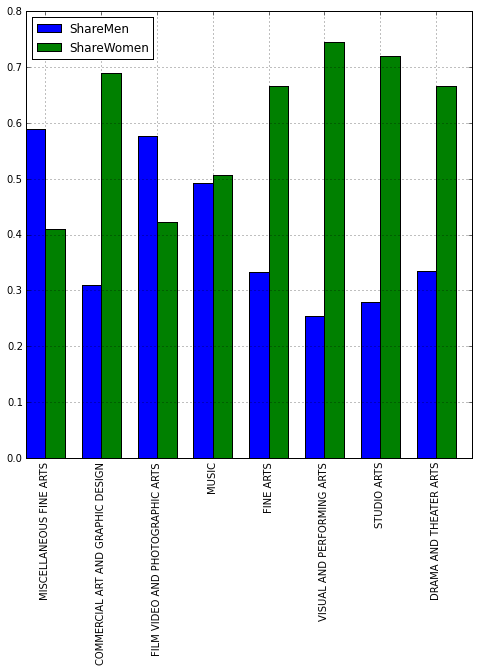

In [76]:
# The same plot as above, this time using matplotlib 
# low-level functions.
import numpy as np
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
count_majors = len(arts_grads_df["Major"].unique())
locs = np.arange(count_majors)
bar_1 = ax.bar(left=locs, 
               height=arts_grads_df["ShareMen"].tolist(), 
               width=0.35)
ax.set_xticklabels(arts_grads_df["Major"].tolist(), rotation=90)
offset_locs = locs + 0.35
bar_2 = ax.bar(left=offset_locs, 
               height=arts_grads_df["ShareWomen"].tolist(), 
               width=0.35, color="green")
ax.set_xticks(offset_locs)
ax.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")
plt.grid()